In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/clean/building_permits_addition_alteration_clean.csv")
df

,record_number,address,latitude,longitude,status,issue_date,number_of_units,current_property_use,building_cost,electrical_cost,...,building_use,condo_association,building_construction_type,bza_case,planning_board_special_permit,bicycle_parking_change,issue_year,Issue_month,calc_total_cost,total_cost_bins
0,62244,"304 Vassar St, Cambridge, MA 02139",42.354803,-71.104827,Active,2020-01-07,0.0,Commercial/Mixed,310000.0,85000.0,...,Commercial/Mixed,0,"Steel/Concrete, Non-Combustible (Type I/II)",0,0,False,2020,1,424600.0,high
1,62595,"174 Alewife Brook Pkwy, Cambridge, MA 02138",42.390588,-71.140620,Active,2019-12-23,0.0,Commercial/Mixed,10000.0,2000.0,...,Commercial/Mixed,0,"Steel/Concrete, Non-Combustible (Type I/II)",0,0,False,2019,12,16500.0,low
2,62708,"1493 Cambridge St, Cambridge, MA 02139",42.374425,-71.104437,Active,2020-01-10,0.0,Commercial/Mixed,34800.0,0.0,...,Commercial/Mixed,0,"Steel/Concrete, Non-Combustible (Type I/II)",0,0,False,2020,1,34800.0,medium
3,53472,"151 Magazine St, Cambridge, MA 02139",42.358092,-71.112429,Complete,2019-08-12,3.0,Multi-Family,4000.0,0.0,...,Multi-Family,1,Wood (Type (IV/V),0,0,False,2019,8,4000.0,low
4,53646,"292 Columbia St, Unit 2, Cambridge, MA 02141",42.370272,-71.095866,Active,2019-08-29,3.0,Multi-Family,55000.0,0.0,...,Multi-Family,0,Masonry / Wood (Type III),0,0,False,2019,8,55000.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,60748,"105 Broadway, Cambridge, MA 02142",42.364383,-71.087858,Active,2019-11-20,0.0,Commercial/Mixed,101000.0,300000.0,...,Commercial/Mixed,0,"Steel/Concrete, Non-Combustible (Type I/II)",0,0,False,2019,11,586000.0,high
11847,61701,"377 Putnam Ave, Cambridge, Ma 02139",42.368296,-71.101828,Active,2019-12-26,0.0,Commercial/Mixed,3186000.0,214000.0,...,Commercial/Mixed,0,"Steel/Concrete, Non-Combustible (Type I/II)",1,1,False,2019,12,3400000.0,very high
11848,61881,"9 Brookline St, Cambridge, MA 02139",42.363788,-71.101715,Active,2020-01-13,0.0,Commercial/Mixed,9350.0,0.0,...,Commercial/Mixed,0,Masonry / Wood (Type III),0,0,False,2020,1,10200.0,low
11849,62039,"99 Magazine St, Unit 1, Cambridge, MA 02139",42.360474,-71.109815,Complete,2019-12-10,2.0,One/Two-Family,24551.0,1800.0,...,One/Two-Family,0,Wood (Type (IV/V),0,0,False,2019,12,32901.0,medium


In [3]:
df_numerical = df.select_dtypes(include="number")
df_numerical

,record_number,latitude,longitude,number_of_units,building_cost,electrical_cost,plumbing_cost,gas_cost,hvac_cost,total_cost,fire_prevention_cost,size_of_new_addition,condo_association,bza_case,planning_board_special_permit,issue_year,Issue_month,calc_total_cost
0,62244,42.354803,-71.104827,0.0,310000.0,85000.0,0.0,0.0,29600.0,424600.0,0.0,0.0,0,0,0,2020,1,424600.0
1,62595,42.390588,-71.140620,0.0,10000.0,2000.0,1000.0,0.0,0.0,16500.0,3500.0,0.0,0,0,0,2019,12,16500.0
2,62708,42.374425,-71.104437,0.0,34800.0,0.0,0.0,0.0,0.0,34800.0,0.0,0.0,0,0,0,2020,1,34800.0
3,53472,42.358092,-71.112429,3.0,4000.0,0.0,0.0,0.0,0.0,4000.0,0.0,0.0,1,0,0,2019,8,4000.0
4,53646,42.370272,-71.095866,3.0,55000.0,0.0,0.0,0.0,0.0,55000.0,0.0,0.0,0,0,0,2019,8,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11846,60748,42.364383,-71.087858,0.0,101000.0,300000.0,160000.0,0.0,25000.0,586000.0,0.0,0.0,0,0,0,2019,11,586000.0
11847,61701,42.368296,-71.101828,0.0,3186000.0,214000.0,0.0,0.0,0.0,3400000.0,0.0,2770.0,0,1,1,2019,12,3400000.0
11848,61881,42.363788,-71.101715,0.0,9350.0,0.0,0.0,0.0,0.0,10200.0,850.0,0.0,0,0,0,2020,1,10200.0
11849,62039,42.360474,-71.109815,2.0,24551.0,1800.0,6550.0,0.0,0.0,32901.0,0.0,0.0,0,0,0,2019,12,32901.0


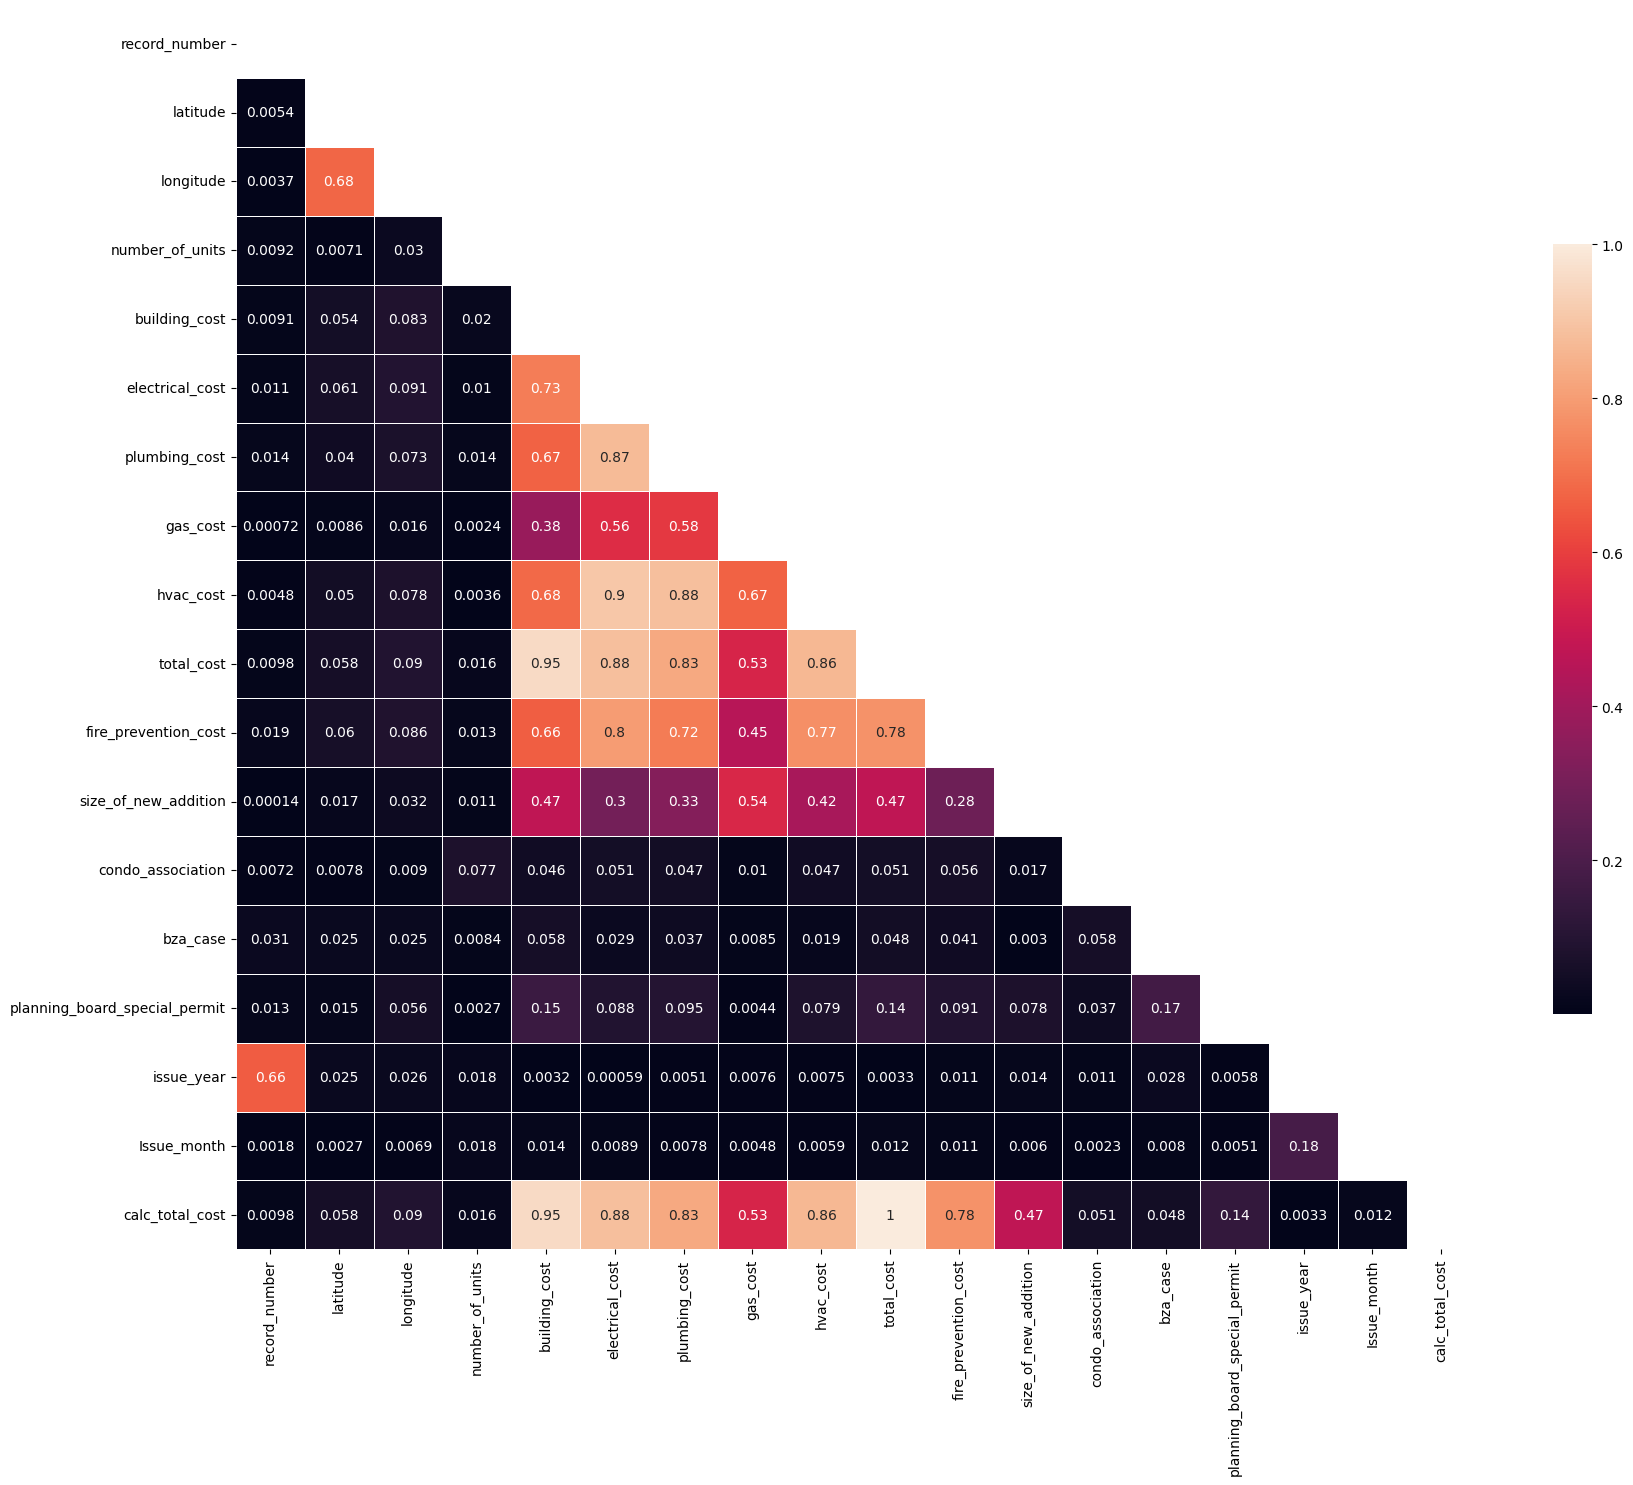

In [4]:
#creating corelation matrix

corr=np.abs(df_numerical.corr()) # corr(x,y) = corr(y, x), corr(x,x) = 1

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [5]:
# sns.pairplot(df_numerical) KEEP COMMENTED OUT!
# plt.show()

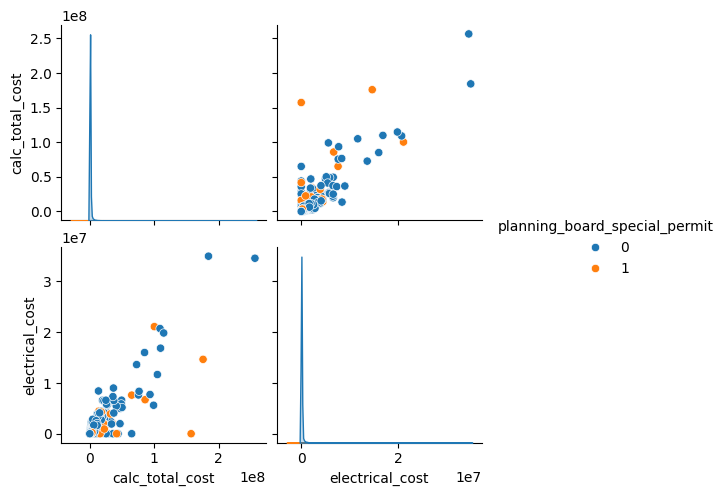

In [6]:
sns.pairplot(df[["calc_total_cost", "electrical_cost","planning_board_special_permit"]], hue='planning_board_special_permit')
plt.show()

## Features

In [7]:
columns = df.select_dtypes(exclude="number").columns

for column in columns:
    if df[column][0] != False:
        print(column, df[column].nunique())
        display(df[column].unique())
        print("")

address 7778


array(['304 Vassar St, Cambridge, MA 02139',
       '174 Alewife Brook Pkwy, Cambridge, MA 02138',
       '1493 Cambridge St, Cambridge, MA 02139', ...,
       '9 Brookline St, Cambridge, MA 02139',
       '99 Magazine St, Unit 1, Cambridge, MA 02139',
       '431 Putnam Ave, Cambridge, MA 02139'], shape=(7778,), dtype=object)


status 2


array(['Active', 'Complete'], dtype=object)


issue_date 1537


array(['2020-01-07', '2019-12-23', '2020-01-10', ..., '2019-09-13',
       '2019-12-09', '2019-08-02'], shape=(1537,), dtype=object)


current_property_use 4


array(['Commercial/Mixed', 'Multi-Family', 'Townhouse', 'One/Two-Family'],
      dtype=object)


description 10808


array(['Complete interior and limited exterior renovations to existing 3,400 s.f., 1-story masonry building including interior build-out, finishes, lighting, mechanical, roofing and masonry repair.',
       'demo of interior walls / carpet / tile and ACT',
       'Replacement or 7-fire door due to damaged doors and hardware',
       ...,
       'install a metal stud wall wityh 5/8 fire code for repair of hood vent, replace kitchen floor',
       'Renovate existing bathroom. New plumbing fixtures, same locations. New tile, paint through out. No change in footprint.',
       'Replace railings and 2 columns on 1st floor front porch to existing dimensions. New railing will be 36" high'],
      shape=(10808,), dtype=object)


isd_description 9875


array(['Interior Renovation - partial first and second floors (no exterior work)',
       'Demolition of interior walls and finishes',
       'Replace (7) fire rated doors with like-kind rating', ...,
       "Foundations for new transformers; fencing greater than 7'",
       'Install a metal stud wall with 5/8 fire code for repair of hood vent, replace kitchen floor',
       'Replace railings and 2 columns on 1st floor front porch to existing dimensions. New railing will be 36" high'],
      shape=(9875,), dtype=object)


change_in_at_least_half_of_total_area 2


array([ True, False])


firm_name 4447


array(['Other', 'TC Remodeling', 'albert m stuart', ...,
       'Longden Company, Inc', 'McCourt Construction Company, Inc.',
       'bna'], shape=(4447,), dtype=object)


debris_disposal 4742


array(['Stoughton Recycling', 'waste manamgent by Hammer demo',
       'albert m stuart', ..., 'Generator to be re-purposed elsewhere',
       'Statewide Demo. James Grant, Hyde Park',
       'Everett Transfer Station'], shape=(4742,), dtype=object)


description_of_demolition 7190


array(['Floor demo with no HVAC or plumbing, minor electrical demo',
       'demo interior walls \xa0and some carpet /tiles and act,',
       'Removing old doors', ..., 'remove floor',
       'Demo existing walk in shower and bathroom tile through out bathroom.',
       'Temp shoring. Remove railing and posts on 1st floor deck'],
      shape=(7190,), dtype=object)


method_of_removal 5


array(['Daily Removal', 'Dumpster', 'Minimal', 'Other', 'Container'],
      dtype=object)


type_of_demolition 5


array(['Minor interior demolition in work area only',
       'Exterior demolition in work area only.', 'No demolition required',
       'Substantial work area demolition or complete interior demolition.',
       'Substantial demolition of any structural element or demolition of more than 25% of existing building.'],
      dtype=object)


building_use 4


array(['Commercial/Mixed', 'Multi-Family', 'One/Two-Family', 'Townhouse'],
      dtype=object)


building_construction_type 3


array(['Steel/Concrete, Non-Combustible (Type I/II)', 'Wood (Type (IV/V)',
       'Masonry / Wood (Type III)'], dtype=object)


total_cost_bins 4


array(['high', 'low', 'medium', 'very high'], dtype=object)

### status

### building_use

In [8]:
df \
    .groupby(["building_use"]) \
    .agg(n=('record_number', 'count'), total_cost_avg=("building_cost", "max")) \
    # .sort_values(by='record_number', ascending=False)



,n,total_cost_avg
building_use,,
Commercial/Mixed,3314,157241000.0
Multi-Family,3089,74102198.0
One/Two-Family,5080,7500000.0
Townhouse,368,3900600.0


In [9]:
df \
    .groupby(["current_property_use"]) \
    .agg('count') \
    # .sort_values(by='current_property_use', ascending=False)

,record_number,address,latitude,longitude,status,issue_date,number_of_units,building_cost,electrical_cost,plumbing_cost,...,building_use,condo_association,building_construction_type,bza_case,planning_board_special_permit,bicycle_parking_change,issue_year,Issue_month,calc_total_cost,total_cost_bins
current_property_use,,,,,,,,,,,,,,,,,,,,,
Commercial/Mixed,3331,3331,3331,3331,3331,3331,3331,3331,3331,3331,...,3331,3331,3331,3331,3331,3331,3331,3331,3331,3331
Multi-Family,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093,...,3093,3093,3093,3093,3093,3093,3093,3093,3093,3093
One/Two-Family,5058,5058,5058,5058,5058,5058,5058,5058,5058,5058,...,5058,5058,5058,5058,5058,5058,5058,5058,5058,5058
Townhouse,369,369,369,369,369,369,369,369,369,369,...,369,369,369,369,369,369,369,369,369,369


In [10]:
df \
    .groupby(["current_property_use", "building_use"]) \
    .agg('count') \
    .sort_values(by='current_property_use', ascending=False)

record_number  address  latitude  \
current_property_use building_use                                         
Townhouse            Commercial/Mixed              2        2         2   
                     Multi-Family                 24       24        24   
                     One/Two-Family               42       42        42   
                     Townhouse                   301      301       301   
One/Two-Family       Commercial/Mixed              2        2         2   
                     Multi-Family                102      102       102   
                     One/Two-Family             4901     4901      4901   
                     Townhouse                    53       53        53   
Multi-Family         Commercial/Mixed              5        5         5   
                     Multi-Family               2944     2944      2944   
                     One/Two-Family              130      130       130   
                     Townhouse                    14       14        14   
Commercial/Mixed     Commercial/Mixed           3305     3305      3305   
                     Multi-Family                 19       19        19   
                     One/Two-Family                7        7         7   

                                       longitude  status  issue_date  \
current_property_use building_use                                      
Townhouse            Commercial/Mixed          2       2           2   
                     Multi-Family             24      24          24   
                     One/Two-Family           42      42          42   
                     Townhouse               301     301         301   
One/Two-Family       Commercial/Mixed          2       2           2   
                     Multi-Family            102     102         102   
                     One/Two-Family         4901    4901        4901   
                     Townhouse                53      53          53   
Multi-Family         Commercial/Mixed          5       5           5   
                     Multi-Family           2944    2944        2944   
                     One/Two-Family          130     130         130   
                     Townhouse                14      14          14   
Commercial/Mixed     Commercial/Mixed       3305    3305        3305   
                     Multi-Family             19      19          19   
                     One/Two-Family            7       7           7   

                                       number_of_units  building_cost  \
current_property_use building_use                                       
Townhouse            Commercial/Mixed                2              2   
                     Multi-Family                   24             24   
                     One/Two-Family                 42             42   
                     Townhouse                     301            301   
One/Two-Family       Commercial/Mixed                2              2   
                     Multi-Family                  102            102   
                     One/Two-Family               4901           4901   
                     Townhouse                      53             53   
Multi-Family         Commercial/Mixed                5              5   
                     Multi-Family                 2944           2944   
                     One/Two-Family                130            130   
                     Townhouse                      14             14   
Commercial/Mixed     Commercial/Mixed             3305           3305   
                     Multi-Family                   19             19   
                     One/Two-Family                  7              7   

                                       electrical_cost  plumbing_cost  ...  \
current_property_use building_use                                      ...   
Townhouse            Commercial/Mixed                2              2  ...   
                     Multi-Family                   24        